<a href="https://colab.research.google.com/github/AdewoleJasper/bookish-lamp/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import numpy as np
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype("float")/255.

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype("float")/255.





In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding = "same",activation = "relu"))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation = "sigmoid"))
model.add(layers.Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4608)             

In [19]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["acc"])

In [20]:
history = model.fit(train_images, train_labels, epochs = 3, batch_size = 1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/3





60000/60000 [==============================] - 224s 4ms/step - loss: 0.5097 - acc: 0.8403
Epoch 2/3
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0865 - acc: 0.9742
Epoch 3/3
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0529 - acc: 0.9841


In [0]:
history = history.history

In [24]:
history.keys()

dict_keys(['loss', 'acc'])

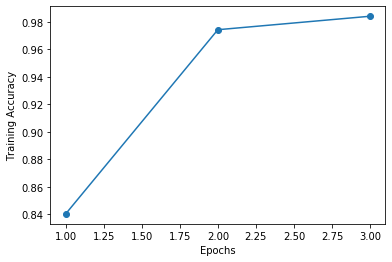

In [27]:
import matplotlib.pyplot as plt
epochs = range(1, 4)
training_accuracy = history["acc"]
plt.plot(epochs, training_accuracy, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()